# Measure noise performance of sheaf-based transmitter locating
(c) 2019 Michael Robinson

In [1]:
from generate_data import *
import fox_sheaf as fs
import numpy as np
import pysheaf as ps
import matplotlib.pyplot as plt
import copy

Basic simulation parameters

In [2]:
ntrials=5 # Number of trials to run for data

noise_devs=np.linspace(0.00000001,0.01,20) # Noise deviation
angle_devs=np.linspace(0.01,10.0,20) # Angle deviation (degrees)

Transmitter is in a fixed location, along with three receivers, also at fixed locations.  Note that we do not yet generate `Receiver` instances for the receivers.  We'll do that later!

In [3]:
txA=Transmitter(location=np.array([0.5,0.5]),power=1.0,identity='A')

rx1_location=np.array([1.0,0.0])
rx2_location=np.array([1.0,1.0])
rx3_location=np.array([0.0,0.0])
rx4_location=np.array([0.0,0.5])
rx_types=['bearing','bearing','rssi','rssi']

## Performance under simulated noisy RSSI measurements
We'll build a fresh set of receivers for each trial of the simulation.  As a result, we also build a fresh sheaf for each trial.

Preallocate arrays to store the results of all trials

In [4]:
crs_noise_post=np.zeros([len(noise_devs),ntrials])
nn=np.zeros([len(noise_devs),ntrials])
errors_noise_extended=np.zeros([len(noise_devs),ntrials])

Run the simulation!

In [5]:
for k in range(nn.shape[0]):
    noise_dev=noise_devs[k]
    for m in range(nn.shape[1]):
        print('{} % complete: Trial {} of {}, noise {} of {}'.format(int(100*((m+k*nn.shape[1])/(ntrials*(len(noise_devs)+len(angle_devs))))),m+1,nn.shape[1],k+1,nn.shape[0]))
        
        nn[k,m]=noise_dev
        
        # Case 1
        rx1=Receiver(rx_noise_level=noise_dev,rx_antenna_beamwidth=angle_devs[0])
        rx1.name='1'
        rx1.add_reception(time=0.0,location=rx1_location,transmitter=txA)
        
        rx2=Receiver(rx_noise_level=noise_dev,rx_antenna_beamwidth=angle_devs[0])
        rx2.name='2'
        rx2.add_reception(time=0.0,location=rx2_location,transmitter=txA)
        
        rx3=Receiver(rx_noise_level=noise_dev,rx_antenna_beamwidth=angle_devs[0])
        rx3.name='3'
        rx3.add_reception(time=0.0,location=rx3_location,transmitter=txA)
        
        rx4=Receiver(rx_noise_level=noise_dev,rx_antenna_beamwidth=angle_devs[0])
        rx4.name='4'
        rx4.add_reception(time=0.0,location=rx4_location,transmitter=txA)

        rxs=[rx1,rx2,rx3,rx4]
        
        sheaf=fs.FoxSheaf(rx_types,rxs)
        
        sheaf.FuseAssignment()

        # Record the consistency radius
        crs_noise_post[k,m]=sheaf.ComputeConsistencyRadius()
        
        # Record the error in fox location
        errors_noise_extended[k,m]=np.linalg.norm(sheaf.GetCell(1).mDataAssignment.mValue-txA.location)

0 % complete: Trial 1 of 5, noise 1 of 20
0 % complete: Trial 2 of 5, noise 1 of 20
1 % complete: Trial 3 of 5, noise 1 of 20
1 % complete: Trial 4 of 5, noise 1 of 20
2 % complete: Trial 5 of 5, noise 1 of 20
2 % complete: Trial 1 of 5, noise 2 of 20
3 % complete: Trial 2 of 5, noise 2 of 20
3 % complete: Trial 3 of 5, noise 2 of 20
4 % complete: Trial 4 of 5, noise 2 of 20
4 % complete: Trial 5 of 5, noise 2 of 20
5 % complete: Trial 1 of 5, noise 3 of 20
5 % complete: Trial 2 of 5, noise 3 of 20
6 % complete: Trial 3 of 5, noise 3 of 20
6 % complete: Trial 4 of 5, noise 3 of 20
7 % complete: Trial 5 of 5, noise 3 of 20
7 % complete: Trial 1 of 5, noise 4 of 20
8 % complete: Trial 2 of 5, noise 4 of 20
8 % complete: Trial 3 of 5, noise 4 of 20
9 % complete: Trial 4 of 5, noise 4 of 20
9 % complete: Trial 5 of 5, noise 4 of 20
10 % complete: Trial 1 of 5, noise 5 of 20
10 % complete: Trial 2 of 5, noise 5 of 20
11 % complete: Trial 3 of 5, noise 5 of 20
11 % complete: Trial 4 of 5, no

Plot the consistency radius

Text(0.5, 1.0, 'Noise-induced inconsistency')

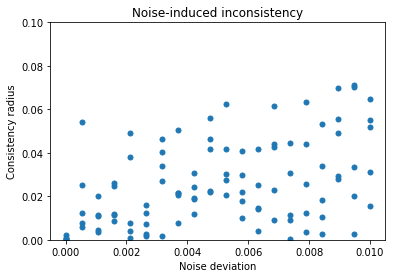

In [6]:
maxcr=0.1
plt.figure()
plt.plot(nn.flatten(),crs_noise_post.flatten(),'.',markersize=10)
plt.ylim([0,maxcr])
plt.xlabel('Noise deviation')
plt.ylabel('Consistency radius')
plt.title('Noise-induced inconsistency')

Plot the fox location error

Text(0.5, 1.0, 'Location errors after filtering')

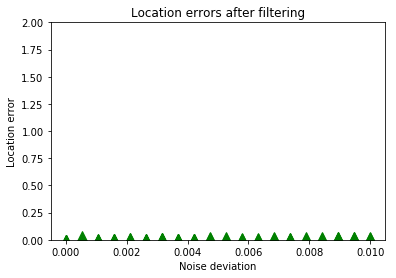

In [7]:
plt.figure()
plt.plot(nn.flatten(),errors_noise_extended.flatten(),'g^',markersize=10)
plt.ylim([0,2])
plt.xlabel('Noise deviation')
plt.ylabel('Location error')
plt.title('Location errors after filtering')

## Performance under simulated noisy bearing measurements
The RSSI measurements are without noise, and this goes much as above!

Preallocate arrays for the results

In [8]:
crs_angle_post=np.zeros([len(angle_devs),ntrials])
aa=np.zeros([len(angle_devs),ntrials])
errors_angle_extended=np.zeros([len(noise_devs),ntrials])

Run the simulation

In [9]:
for k in range(aa.shape[0]):
    angle_dev=angle_devs[k]
    for m in range(aa.shape[1]):

        print('{} % complete: Trial {} of {}, angle {} of {}'.format(int(100*((m+k*aa.shape[1]+ntrials*len(noise_devs))/(ntrials*(len(noise_devs)+len(angle_devs))))),m+1,aa.shape[1],k+1,aa.shape[0]))
        
        aa[k,m]=angle_dev
        # Case 1
        rx1=Receiver(rx_antenna_beamwidth=angle_dev)
        rx1.name='1'
        rx1.add_reception(time=0.0,location=rx1_location,transmitter=txA)
        
        rx2=Receiver(rx_antenna_beamwidth=angle_dev)
        rx2.name='2'
        rx2.add_reception(time=0.0,location=rx2_location,transmitter=txA)
        
        rx3=Receiver(rx_antenna_beamwidth=angle_dev)
        rx3.name='3'
        rx3.add_reception(time=0.0,location=rx3_location,transmitter=txA)
        
        rx4=Receiver(rx_antenna_beamwidth=angle_dev)
        rx4.name='4'
        rx4.add_reception(time=0.0,location=rx4_location,transmitter=txA)
        
        rxs=[rx1,rx2,rx3,rx4]
        
        sheaf=fs.FoxSheaf(rx_types,rxs)
        
        sheaf.FuseAssignment()

        # Record the consistency radius
        crs_angle_post[k,m]=sheaf.ComputeConsistencyRadius()
        
        # Record the error in fox location
        errors_angle_extended[k,m]=np.linalg.norm(sheaf.GetCell(1).mDataAssignment.mValue-txA.location)

50 % complete: Trial 1 of 5, angle 1 of 20
50 % complete: Trial 2 of 5, angle 1 of 20
51 % complete: Trial 3 of 5, angle 1 of 20
51 % complete: Trial 4 of 5, angle 1 of 20
52 % complete: Trial 5 of 5, angle 1 of 20
52 % complete: Trial 1 of 5, angle 2 of 20
53 % complete: Trial 2 of 5, angle 2 of 20
53 % complete: Trial 3 of 5, angle 2 of 20
54 % complete: Trial 4 of 5, angle 2 of 20
54 % complete: Trial 5 of 5, angle 2 of 20
55 % complete: Trial 1 of 5, angle 3 of 20
55 % complete: Trial 2 of 5, angle 3 of 20
56 % complete: Trial 3 of 5, angle 3 of 20
56 % complete: Trial 4 of 5, angle 3 of 20
56 % complete: Trial 5 of 5, angle 3 of 20
57 % complete: Trial 1 of 5, angle 4 of 20
57 % complete: Trial 2 of 5, angle 4 of 20
58 % complete: Trial 3 of 5, angle 4 of 20
59 % complete: Trial 4 of 5, angle 4 of 20
59 % complete: Trial 5 of 5, angle 4 of 20
60 % complete: Trial 1 of 5, angle 5 of 20
60 % complete: Trial 2 of 5, angle 5 of 20
61 % complete: Trial 3 of 5, angle 5 of 20
61 % comple

Plot the consistency radii

Text(0.5, 1.0, 'Angle-induced inconsistency')

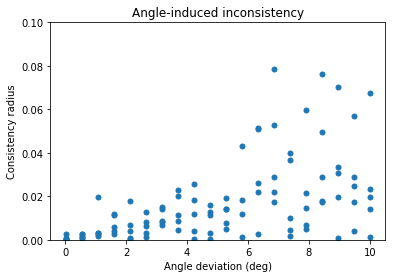

In [10]:
plt.figure()
plt.plot(aa.flatten(),crs_angle_post.flatten(),'.',markersize=10)
plt.ylim([0,maxcr])
plt.xlabel('Angle deviation (deg)')
plt.ylabel('Consistency radius')
plt.title('Angle-induced inconsistency')

Plot the fox location errors

Text(0.5, 1.0, 'Location errors after filtering')

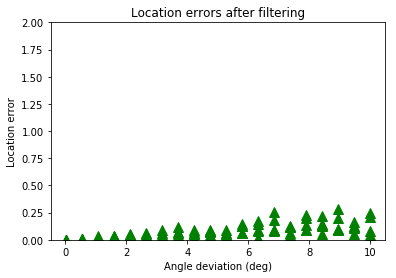

In [11]:
plt.figure()
plt.plot(aa.flatten(),errors_angle_extended.flatten(),'g^',markersize=10)
plt.ylim([0,2])
plt.xlabel('Angle deviation (deg)')
plt.ylabel('Location error')
plt.title('Location errors after filtering')